In [4]:
pip install maup

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import geopandas as gpd
import maup
import time

In [31]:
# We can comment everything else above because now we saved our dataframes so we
# no longer need to keep importing

In [32]:
population_df = pd.read_pickle("population_df.pkl")
vap_df = pd.read_pickle("vap_df.pkl")
cong_df = pd.read_pickle("cong_df.pkl")
election_df = pd.read_pickle("election_df_16.pkl")

In [33]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

# Put data into geometry units

In [34]:
# connecticut crs is 26956
population_df = population_df.to_crs(epsg=26956)
vap_df = vap_df.to_crs(epsg=26956)
election_df = election_df.to_crs(epsg=26956)
election_df_16 = election_df_16.to_crs(epsg=26956)

In [36]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

In [37]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [38]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

We'll put all of the population columns into the election dataframe

In [39]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

Let's check to make sure we didn't lose anyone.

In [40]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

3605944
3605944.0
2869227
2869227.0


In [41]:
print(maup.doctor(election_df))

There are 18 overlaps.
There are 2 holes.
There are some invalid geometries.
False


In [42]:
# election_df = maup.quick_repair(election_df)

In [43]:
election_df = maup.smart_repair(election_df)

/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Users/blaydeomura/miniconda3/envs/gerry/lib/pytho

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()
/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/sit

Identifying overlaps...
Resolving overlaps...


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], t

Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|                                   | 0/2 [00:00<?, ?it/s]/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[

In [44]:
print(maup.doctor(election_df))

True


# Get districts assignment and put it into dataframe

In [45]:
cong_df = cong_df.to_crs(epsg=26956)

In [46]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

In [47]:
district_col_name = "DISTRICT"

In [48]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]
print(set(cong_df[district_col_name]))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4}
{'5', '3', '2', '4', '1'}
{'5', '2', '1', '4', '3'}


/var/folders/8v/_dv8pl_n0nv2335c5f2bkdnr0000gn/T/ipykernel_17802/674538680.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]


In [50]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDDUR': 'G20USSD', 
                                        'G20USSRCUR': 'G20USSR'}

In [51]:
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREOWRI',
 'G16USSDBLU',
 'G16USSRCAR',
 'G16USSLLIO',
 'G16USSGRUS',
 'G16USSOWRI',
 'geometry',
 'P0020001',
 'P0020002',
 'P0020005',
 'P0020006',
 'P0020007',
 'P0020008',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0040001',
 'P0040002',
 'P0040005',
 'P0040006',
 'P0040007',
 'P0040008',
 'P0040009',
 'P0040010',
 'P0040011',
 'CD']

In [52]:
election_df.rename(columns=rename_dict, inplace = True)

In [53]:
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREOWRI',
 'G16USSDBLU',
 'G16USSRCAR',
 'G16USSLLIO',
 'G16USSGRUS',
 'G16USSOWRI',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

In [55]:
# election_df.drop(columns=[ 'G20PRELJOR','G20PREGHAW','G20PREOWRI'], inplace=True)
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREOWRI',
 'G16USSDBLU',
 'G16USSRCAR',
 'G16USSLLIO',
 'G16USSGRUS',
 'G16USSOWRI',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

<Axes: >

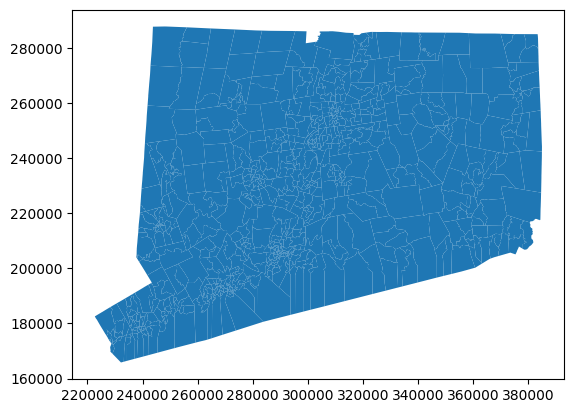

In [56]:
election_df.plot()

In [57]:
# Convert to string and strip spaces, then convert to numeric
election_df["CD"] = pd.to_numeric(election_df["CD"].astype(str).str.strip(), errors='coerce')

In [58]:
print(election_df.loc[election_df["CD"] == 1, "TOTPOP"].sum())
print(election_df.loc[election_df["CD"] == 2, "TOTPOP"].sum())
pop_vals = [election_df.loc[election_df["CD"] == n, "TOTPOP"].sum() for n in range(1, 6)]
print(pop_vals)

715659.0
725372.0
[715659.0, 725372.0, 717651.0, 726330.0, 720932.0]


In [59]:
missing_percentage = election_df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATEFP20     0.000000
COUNTYFP20    0.000000
NAME20        0.000000
G16PREDCLI    0.000000
G16PRERTRU    0.000000
G16PRELJOH    0.000000
G16PREGSTE    0.000000
G16PREOWRI    0.000000
G16USSDBLU    0.000000
G16USSRCAR    0.000000
G16USSLLIO    0.000000
G16USSGRUS    0.000000
G16USSOWRI    0.000000
geometry      0.000000
TOTPOP        0.269179
HISP          0.269179
NH_WHITE      0.269179
NH_BLACK      0.269179
NH_AMIN       0.269179
NH_ASIAN      0.269179
NH_NHPI       0.269179
NH_OTHER      0.269179
NH_2MORE      0.269179
VAP           0.269179
HVAP          0.269179
WVAP          0.269179
BVAP          0.269179
AMINVAP       0.269179
ASIANVAP      0.269179
NHPIVAP       0.269179
OTHERVAP      0.269179
2MOREVAP      0.269179
CD            0.000000
dtype: float64


In [60]:
# Show rows with missing values
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
    STATEFP20 COUNTYFP20             NAME20  G16PREDCLI  G16PRERTRU  \
500        09        009  East Haven 001-03         102          73   
501        09        009  East Haven 005-03          53          33   

     G16PRELJOH  G16PREGSTE  G16PREOWRI  G16USSDBLU  G16USSRCAR  ...  VAP  \
500           1           2           0         123          31  ...  NaN   
501           1           0           0          64          13  ...  NaN   

     HVAP  WVAP BVAP  AMINVAP  ASIANVAP  NHPIVAP  OTHERVAP  2MOREVAP  CD  
500   NaN   NaN  NaN      NaN       NaN      NaN       NaN       NaN   3  
501   NaN   NaN  NaN      NaN       NaN      NaN       NaN       NaN   3  

[2 rows x 33 columns]

Columns with missing values:
Index(['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')


In [61]:
election_df.fillna(0, inplace=True)

In [62]:
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATEFP20     0.000000
COUNTYFP20    0.000000
NAME20        0.000000
G16PREDCLI    0.000000
G16PRERTRU    0.000000
G16PRELJOH    0.000000
G16PREGSTE    0.000000
G16PREOWRI    0.000000
G16USSDBLU    0.000000
G16USSRCAR    0.000000
G16USSLLIO    0.000000
G16USSGRUS    0.000000
G16USSOWRI    0.000000
geometry      0.000000
TOTPOP        0.269179
HISP          0.269179
NH_WHITE      0.269179
NH_BLACK      0.269179
NH_AMIN       0.269179
NH_ASIAN      0.269179
NH_NHPI       0.269179
NH_OTHER      0.269179
NH_2MORE      0.269179
VAP           0.269179
HVAP          0.269179
WVAP          0.269179
BVAP          0.269179
AMINVAP       0.269179
ASIANVAP      0.269179
NHPIVAP       0.269179
OTHERVAP      0.269179
2MOREVAP      0.269179
CD            0.000000
dtype: float64


In [63]:
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
Empty GeoDataFrame
Columns: [STATEFP20, COUNTYFP20, NAME20, G16PREDCLI, G16PRERTRU, G16PRELJOH, G16PREGSTE, G16PREOWRI, G16USSDBLU, G16USSRCAR, G16USSLLIO, G16USSGRUS, G16USSOWRI, geometry, TOTPOP, HISP, NH_WHITE, NH_BLACK, NH_AMIN, NH_ASIAN, NH_NHPI, NH_OTHER, NH_2MORE, VAP, HVAP, WVAP, BVAP, AMINVAP, ASIANVAP, NHPIVAP, OTHERVAP, 2MOREVAP, CD]
Index: []

[0 rows x 33 columns]

Columns with missing values:
Index([], dtype='object')


In [64]:
election_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP20   743 non-null    object  
 1   COUNTYFP20  743 non-null    object  
 2   NAME20      743 non-null    object  
 3   G16PREDCLI  743 non-null    int64   
 4   G16PRERTRU  743 non-null    int64   
 5   G16PRELJOH  743 non-null    int64   
 6   G16PREGSTE  743 non-null    int64   
 7   G16PREOWRI  743 non-null    int64   
 8   G16USSDBLU  743 non-null    int64   
 9   G16USSRCAR  743 non-null    int64   
 10  G16USSLLIO  743 non-null    int64   
 11  G16USSGRUS  743 non-null    int64   
 12  G16USSOWRI  743 non-null    int64   
 13  geometry    743 non-null    geometry
 14  TOTPOP      743 non-null    float64 
 15  HISP        743 non-null    float64 
 16  NH_WHITE    743 non-null    float64 
 17  NH_BLACK    743 non-null    float64 
 18  NH_AMIN     743 non-null    float64 
 19  

In [65]:
election_df.to_file("./CT/CT_final.shp")